# Estimating parameters for multiple stocks

## 1. Consider $n$ stocks with models:

$$ S_t^{(k)} = S_0^{(k)} \cdot exp(\mu^{(k)} t + \sigma^{(k)} B_t^{(k)}) $$

__Assuming $cov(B_{t}^i,B_{s}^j) = min\{t,s\} \cdot \rho_{i,j}$ __

__And: __
$$\sigma_k B_t^{(k)} = \sum_{i}^{k} \sigma_{k,i} W_t^{(i)}$$
$$\sigma^2_k = \sum_{j}^{min\{k,j\}} \sigma^2_{k,j}$$

__Or in matrix form: __
$$\begin{bmatrix}
\sigma_1 B^{(1)}\\
\sigma_2 B^{(2)}\\
\sigma_3 B^{(3)}\\
...\\
\sigma_n B^{(n)}
\end{bmatrix}
{=}
\begin{bmatrix}
\sigma_{11}  & 0 & 0 &...&0\\
\sigma_{21}  & \sigma_{22} & 0 &...&0\\
\sigma_{31} & \sigma_{32 }&\sigma_{33} &... &0\\
...&...&...&...&...\\
\sigma_{n1} &\sigma_{n2} &\sigma_{n3} &...&\sigma_{nn}
\end{bmatrix}
\begin{bmatrix}
W^{(1)}\\
W^{(2)}\\
W^{(3)}\\
...\\
W^{(n)}
\end{bmatrix}
$$

Denote $\{\sigma_{i,j}\}$ as matrix $\Sigma$, $\{\sigma_{i}\}$ as the vector $\sigma$. The last equation can be written as:
$$diag[\sigma] B_t = \Sigma W_t$$

For simplicity, subscript t is ommited in this homework.

Since cov(W) is just $ t I$:
$$ cov(\Sigma W) = \Sigma ( tI) \Sigma^T = t \cdot \Sigma \Sigma^T $$

From historical data, $cov(diag[\sigma] B)$ is directly observable, a.k.a the covariance matrix of stocks log returns.
Scale the covariance matrix by $t$, and decompose it into two matrix: $\Sigma, \Sigma^T$.
Cholesky decomposition is unique, so: 

\begin{eqnarray}
\Sigma &=& CholeskyDecompose(cov(diag[\sigma] B) / t)
\end{eqnarray}

\begin{eqnarray}
a\\
\end{eqnarray}

In [18]:
import numpy as np #Handle math objects like vectors and matrixs
import scipy as sp
from scipy.stats import norm # Normal cdf is used
import pandas as pd #Contains data from yahoo
import matplotlib.pyplot as plt # Seeing is believing! --Thrall
from datetime import datetime # Very usefull when you need to operate on date
from datetime import timedelta # Very usefull when you need to operate on date
from yahoo_finance import Share # API from Yahoo to fetch data
%matplotlib inline
float_formatter = lambda x: "%.3f" % x if x >=0 else "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
pd.options.display.float_format = '{:20,.3f}'.format

* Choose the stocks

In [2]:
universe = ['SPY','GOOG','AAPL','AMZN','MSFT','IBM','M','MNST','PNC','ROST','COO']

In [3]:
n = len(universe)

In [4]:
i = datetime.now()
j = i - timedelta(days=252*2)
currentDate = "%s-%s-%s"%(i.year,i.month,i.day)
startDate = "%s-%s-%s"%(j.year,j.month,j.day)

* M is the dataframe that stores log returns of all the stocks.

In [5]:
count = 0
for symbol in universe:
    equity = Share(symbol)
    df = pd.DataFrame(equity.get_historical(startDate,currentDate))
    df.index = df.Date
    df.drop('Date',1,inplace = True)
    df.sort_index(inplace = True) # ,ascending = False
    df['Adj_Close'] = pd.to_numeric(df['Adj_Close'])
    label = symbol#+'_logReturn'
    df[label] = np.log(1+df.Adj_Close.diff(1)/df.Adj_Close)
#     df.fillna(0,inplace = True)
    df.dropna(inplace = True)
    
    if count==0:
        M = df[[label]].copy()
    else:
        M = M.join(df[[label]])
    
    count += 1


* Solve the covariance matrix of the stocks ($C=cov(diag[\sigma] B)/t$)

In [21]:
dt = 1/252
covMat = np.cov(M.values.T)
C = covMat/dt
print(C)

[[0.016 0.015 0.016 0.017 0.018 0.015 0.014 0.012 0.020 0.012 0.011]
 [0.015 0.036 0.019 0.031 0.027 0.013 0.008 0.018 0.014 0.013 0.013]
 [0.016 0.019 0.049 0.022 0.022 0.013 0.007 0.012 0.017 0.012 0.015]
 [0.017 0.031 0.022 0.073 0.028 0.013 -0.00 0.030 0.015 0.009 0.014]
 [0.018 0.027 0.022 0.028 0.044 0.017 0.011 0.019 0.019 0.014 0.014]
 [0.015 0.013 0.013 0.013 0.017 0.034 0.015 0.008 0.019 0.008 0.006]
 [0.014 0.008 0.007 -0.00 0.011 0.015 0.151 0.009 0.023 0.030 0.012]
 [0.012 0.018 0.012 0.030 0.019 0.008 0.009 0.071 0.006 0.015 0.010]
 [0.020 0.014 0.017 0.015 0.019 0.019 0.023 0.006 0.049 0.013 0.008]
 [0.012 0.013 0.012 0.009 0.014 0.008 0.030 0.015 0.013 0.041 0.010]
 [0.011 0.013 0.015 0.014 0.014 0.006 0.012 0.010 0.008 0.010 0.047]]


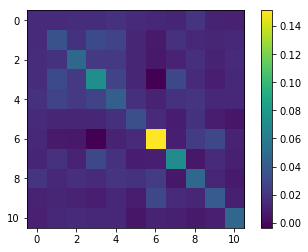

In [9]:
plt.imshow(C)
plt.colorbar() 

In [20]:
dt = 1/252
corrMat = np.corrcoef(M.values.T)
print(corrMat)

[[1.000 0.624 0.572 0.491 0.706 0.630 0.295 0.367 0.737 0.478 0.393]
 [0.624 1.000 0.460 0.605 0.696 0.373 0.106 0.363 0.340 0.339 0.324]
 [0.572 0.460 1.000 0.371 0.481 0.323 0.080 0.203 0.347 0.266 0.305]
 [0.491 0.605 0.371 1.000 0.496 0.255 -0.03 0.418 0.251 0.172 0.232]
 [0.706 0.696 0.481 0.496 1.000 0.448 0.134 0.335 0.420 0.334 0.315]
 [0.630 0.373 0.323 0.255 0.448 1.000 0.213 0.165 0.459 0.219 0.143]
 [0.295 0.106 0.080 -0.03 0.134 0.213 1.000 0.090 0.273 0.378 0.138]
 [0.367 0.363 0.203 0.418 0.335 0.165 0.090 1.000 0.104 0.276 0.176]
 [0.737 0.340 0.347 0.251 0.420 0.459 0.273 0.104 1.000 0.290 0.162]
 [0.478 0.339 0.266 0.172 0.334 0.219 0.378 0.276 0.290 1.000 0.231]
 [0.393 0.324 0.305 0.232 0.315 0.143 0.138 0.176 0.162 0.231 1.000]]


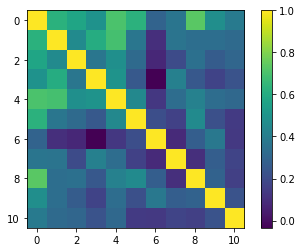

In [12]:
plt.imshow(corrMat)
plt.colorbar()

* Perform Cholesky on C to get $\Sigma$

__$\Sigma = CholeskyDecompose(cov(diag[\sigma] B) / t)$__

In [19]:
Sigma = np.linalg.cholesky(C)
print(Sigma)

[[0.125 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.118 0.148 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.126 0.029 0.179 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.133 0.103 0.013 0.212 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.147 0.068 0.009 0.006 0.131 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.117 -0.00 -0.01 -0.01 0.004 0.143 0.000 0.000 0.000 0.000 0.000]
 [0.115 -0.04 -0.04 -0.07 -0.02 0.006 0.361 0.000 0.000 0.000 0.000]
 [0.098 0.046 -0.01 0.059 0.007 -0.02 0.010 0.235 0.000 0.000 0.000]
 [0.163 -0.03 -0.02 -0.01 -0.02 -0.00 0.005 -0.03 0.140 0.000 0.000]
 [0.097 0.010 -0.00 -0.02 -0.01 -0.02 0.049 0.023 -0.02 0.165 0.000]
 [0.086 0.022 0.018 -0.00 0.000 -0.03 0.010 0.002 -0.04 -0.00 0.192]]


* Recover standard deviation of log returns of stocks $\sigma_k$ from formula:

$$\sigma^2_k = \sum_{j}^{min\{k,j\}} \sigma^2_{k,j}$$

In [68]:
sigma = np.sum(Sigma**2,axis = 1)**(0.5)
print(np.linalg.inv(np.diag(sigma**2)))

[[64.401 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 28.032 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 20.480 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 13.631 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 22.962 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 29.199 0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.000 6.612 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.000 0.000 14.079 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 20.415 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 24.364 0.000]
 [0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 21.076]]


$$ R = \Sigma diag[\sigma]^{-1}$$
$$ d = det(R)^{1/n}$$

In [69]:
R = np.dot(Sigma,np.linalg.inv(np.diag(sigma)))
d = np.linalg.det(R)**(1/n)
print('The diversity is ', d)

The diversity is  0.80259712699


Another way to decompose the covariance matrix is PCA(SVD)

$$C = U \Lambda U^T$$

We will now show that even though $U \Lambda U^T =  \Sigma \Sigma^T$, $U \Lambda^{\frac{1}{2}} \neq \Sigma$

In [22]:
u,s,v = np.linalg.svd(C)

In [73]:
print(s)

[0.214 0.142 0.062 0.043 0.038 0.029 0.027 0.024 0.019 0.011 0.002]


In [42]:
ul = np.dot(u,np.diag(s**0.5))
print(np.dot(ul,ul.T))

[[0.016 0.015 0.016 0.017 0.018 0.015 0.014 0.012 0.020 0.012 0.011]
 [0.015 0.036 0.019 0.031 0.027 0.013 0.008 0.018 0.014 0.013 0.013]
 [0.016 0.019 0.049 0.022 0.022 0.013 0.007 0.012 0.017 0.012 0.015]
 [0.017 0.031 0.022 0.073 0.028 0.013 -0.00 0.030 0.015 0.009 0.014]
 [0.018 0.027 0.022 0.028 0.044 0.017 0.011 0.019 0.019 0.014 0.014]
 [0.015 0.013 0.013 0.013 0.017 0.034 0.015 0.008 0.019 0.008 0.006]
 [0.014 0.008 0.007 -0.00 0.011 0.015 0.151 0.009 0.023 0.030 0.012]
 [0.012 0.018 0.012 0.030 0.019 0.008 0.009 0.071 0.006 0.015 0.010]
 [0.020 0.014 0.017 0.015 0.019 0.019 0.023 0.006 0.049 0.013 0.008]
 [0.012 0.013 0.012 0.009 0.014 0.008 0.030 0.015 0.013 0.041 0.010]
 [0.011 0.013 0.015 0.014 0.014 0.006 0.012 0.010 0.008 0.010 0.047]]


In the cell above we can see $U \Lambda^{\frac{1}{2}} = C$.

Next we compare $U \Lambda^{\frac{1}{2}}$ and $\Sigma$ :

In [71]:
print(ul)

[[-0.10 0.028 0.034 0.010 0.023 0.014 0.002 -0.00 -0.00 0.003 0.042]
 [-0.13 0.079 0.012 -0.00 -0.03 -0.01 0.028 0.051 0.034 -0.08 -0.00]
 [-0.12 0.071 0.071 -0.04 0.020 -0.11 -0.09 -0.04 -0.01 -0.00 -0.00]
 [-0.15 0.158 -0.04 0.039 -0.14 0.008 0.019 -0.04 -0.03 0.017 -0.00]
 [-0.15 0.077 0.037 0.004 0.006 -0.01 0.017 0.085 0.061 0.058 -0.01]
 [-0.10 0.018 0.060 0.050 0.035 0.036 -0.02 0.066 -0.10 -0.00 -0.01]
 [-0.24 -0.30 -0.03 0.005 -0.05 -0.01 -0.02 0.005 0.006 0.001 -0.00]
 [-0.13 0.087 -0.19 0.017 0.086 0.019 -0.04 -0.01 0.008 -0.00 -0.00]
 [-0.13 0.006 0.106 0.071 0.054 0.069 0.003 -0.08 0.039 -0.01 -0.01]
 [-0.12 -0.02 -0.01 -0.03 0.065 -0.06 0.124 -0.03 -0.03 0.007 -0.00]
 [-0.10 0.031 0.018 -0.17 -0.00 0.079 -0.00 -0.01 -0.01 0.001 -0.00]]


In [44]:
print(Sigma)

[[0.125 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.118 0.148 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.126 0.029 0.179 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.133 0.103 0.013 0.212 0.000 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.147 0.068 0.009 0.006 0.131 0.000 0.000 0.000 0.000 0.000 0.000]
 [0.117 -0.00 -0.01 -0.01 0.004 0.143 0.000 0.000 0.000 0.000 0.000]
 [0.115 -0.04 -0.04 -0.07 -0.02 0.006 0.361 0.000 0.000 0.000 0.000]
 [0.098 0.046 -0.01 0.059 0.007 -0.02 0.010 0.235 0.000 0.000 0.000]
 [0.163 -0.03 -0.02 -0.01 -0.02 -0.00 0.005 -0.03 0.140 0.000 0.000]
 [0.097 0.010 -0.00 -0.02 -0.01 -0.02 0.049 0.023 -0.02 0.165 0.000]
 [0.086 0.022 0.018 -0.00 0.000 -0.03 0.010 0.002 -0.04 -0.00 0.192]]
